In [100]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import datetime 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#A little background:

#http://wolfstreet.com/2016/07/06/deutsche-bank-crisis-coco-bonds-shares-new-low-bond-buybacks/

In [2]:
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2016, 8, 12)
db = data.DataReader("DB", 'google', start, end)#Deutsche Bank
dax = data.DataReader("^GDAXI", 'yahoo', start, end)#DAX
iyf= data.DataReader("IYF", 'google', start, end)#US financials
eufn= data.DataReader("EUFN", 'google', start, end)#EU financials



#db.describe()

In [3]:
#lets normalize this
eufn_close = eufn['Close']/eufn['Close'][0]
iyf_close = iyf['Close']/iyf['Close'][0]
dax_close = dax['Close']/dax['Close'][0]
db_close = db['Close']/db['Close'][0]


In [4]:
#pd.concat([s3, s4, s5], axis=1, keys=['red','blue','yellow'])
df_perform = pd.concat([eufn_close, iyf_close, dax_close, db_close], axis=1, keys=['eufn_close', 'iyf_close', 'dax_close', 'db_close'])

In [5]:
df_perform.head()

,eufn_close,iyf_close,dax_close,db_close
Date,,,,
2011-01-03,1.000000,1.000000,1.000000,1.000000
2011-01-04,1.005579,0.996416,0.997941,1.018023
2011-01-05,1.000000,1.007680,0.992858,1.043445
2011-01-06,0.994886,1.002731,0.998805,1.027319
2011-01-07,0.978615,0.994368,0.994005,1.003605


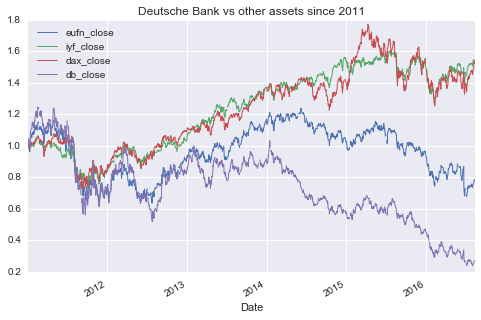

In [6]:
#This plot shows how Deutsche Bank has performed over the past 5 years vis-a-vis other companies
df_perform.plot(figsize=(8,5), lw= 1,grid = True,title='Deutsche Bank vs other assets since 2011', legend=True);

In [7]:
#Let's take log returns of securities aka continuously compounded returns
eufn_returns = np.log(eufn['Close']/eufn['Close'].shift(1))
iyf_returns = np.log(iyf['Close']/iyf['Close'].shift(1))
dax_returns = np.log(dax['Close']/dax['Close'].shift(1))
db_returns = np.log(db['Close']/db['Close'].shift(1))
#pd.concat([s3, s4, s5], axis=1, keys=['red','blue','yellow'])
df_log_returns = pd.concat([eufn_returns, iyf_returns,dax_returns, db_returns], axis=1, keys=['eufn_returns', 'iyf_returns','dax_returns', 'db_returns'])

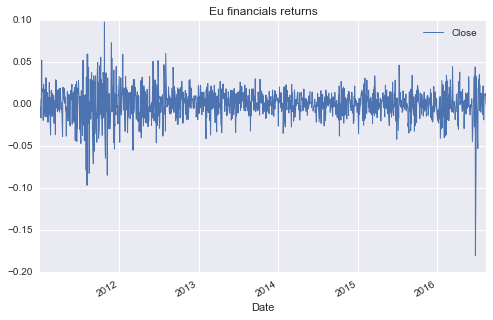

In [8]:
eufn_returns.plot(figsize=(8,5), lw= 1,grid = True,title='Eu financials returns', legend=True);

In [9]:
#log returns for past five days of selected securities relevant to Deutsche Bank
df_log_returns.tail()

,eufn_returns,iyf_returns,dax_returns,db_returns
Date,,,,
2016-08-08,0.012240,0.000885,0.006265,0.024043
2016-08-09,0.010889,0.001768,0.024667,0.019118
2016-08-10,0.010772,-0.006756,-0.003937,0.035066
2016-08-11,0.004158,0.000444,0.008596,0.000703
2016-08-12,-0.001780,-0.001779,-0.002741,0.001404


In [10]:
#Let's get some moving averages
db['50_day'] = db['Close'].rolling(window=50, center=False).mean()
db['100_day'] = db['Close'].rolling(window=100, center=False).mean()
db['150_day'] = db['Close'].rolling(window=150, center=False).mean()
db['200_day'] = db['Close'].rolling(window=200, center=False).mean()


db[['Close', '50_day', '100_day', '150_day','200_day']].tail()

,Close,50_day,100_day,150_day,200_day
Date,,,,,
2016-08-08,13.47,14.8016,16.1146,17.006600,19.23255
2016-08-09,13.73,14.7136,16.0607,16.941600,19.14965
2016-08-10,14.22,14.6420,16.0102,16.882133,19.06700
2016-08-11,14.23,14.5742,15.9618,16.825533,18.98640
2016-08-12,14.25,14.5084,15.9172,16.773200,18.90665


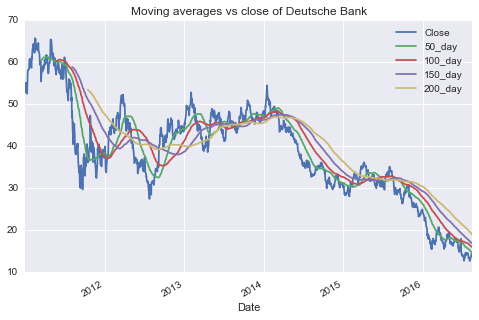

In [11]:
db[['Close', '50_day', '100_day', '150_day','200_day']].plot(figsize=(8,5), grid=True, title="Moving averages vs close of Deutsche Bank");

In [12]:
db_50 = db['50_day']
db_50_plus_10 = db_50*1.10
db_50_minus_10 = db_50*.90

In [13]:
db_50_10pct_window = pd.concat([db['Close'],db_50, db_50_plus_10, db_50_minus_10], axis=1, keys=['db_close','db_50', 'db_50_plus_10', 'db_50_minus_10'])

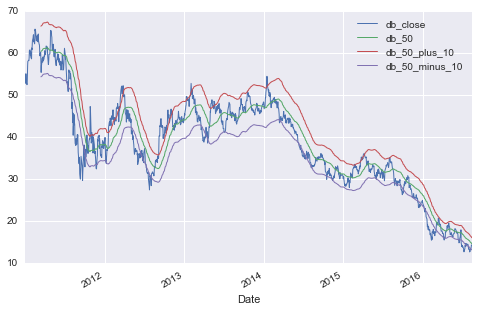

In [14]:
db_50_10pct_window.plot(figsize=(8,5), lw= 1,grid = True);

In [15]:
#What percentage of time did DB close below the .90 mark of its 50 day mavg?
len(np.where(db_50_10pct_window['db_close'] < db_50_10pct_window['db_50_minus_10'])[0])/float(len(db_50_10pct_window))

0.16843595187544233

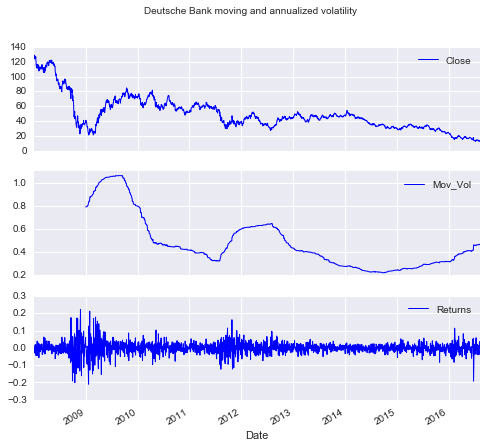

In [16]:
#lets have a look at volatility
import math
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2016, 8, 12)
db = data.DataReader("DB", 'google', start, end)#Deutsche Bank
db['Returns'] = db_returns = np.log(db['Close']/db['Close'].shift(1))
db['Mov_Vol'] = db_returns.rolling(window=252, center=False).std()*math.sqrt(252)
#db_returns.std()


db[['Close', 'Mov_Vol', 'Returns']].plot(subplots=True, style='b', figsize=(8,7), grid=True, lw=1, title='Deutsche Bank moving and annualized volatility');

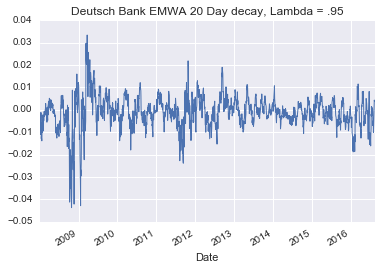

In [23]:
ewma = db_returns.ewm(ignore_na=False,span=20,min_periods=0,adjust=True).mean()
ewma.plot(lw=1, title='Deutsch Bank EMWA 20 Day decay, Lambda = .95');

In [25]:
from urllib import urlretrieve

es_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/hbrbcpe.txt'
vs_url = 'https://www.stoxx.com/document/Indices/Current/HistoricalData/h_vstoxx.txt'
urlretrieve(es_url, './data/es.txt')
urlretrieve(vs_url, './data/vs.txt')

('./data/vs.txt', <httplib.HTTPMessage instance at 0x11473d320>)

In [26]:
!ls -o ./data/*.txt

-rw-r--r--  1 justinsimcock  678399 Aug 15 18:40 ./data/es.txt
-rw-r--r--  1 justinsimcock  363485 Aug 15 18:40 ./data/vs.txt


In [32]:
lines = open('./data/es.txt', 'r').readlines()
lines = [line.replace(' ', '') for line in lines]
lines[-6:]

['25.04.2016;2917.33;3117.62;346.68;329.70;411.56;353.14;9387.73;588.18;\n',
 '26.04.2016;2922.57;3121.29;347.31;330.30;411.75;353.79;9395.03;587.73;\n',
 '27.04.2016;2927.31;3130.43;348.32;331.69;413.25;354.41;9424.15;589.23;\n',
 '28.04.2016;2932.00;3125.43;348.90;331.76;413.78;355.47;9459.04;591.95;\n',
 '29.04.2016;2856.28;3028.21;341.48;323.70;404.71;348.87;9278.19;581.67;\n',
 '02.05.2016;2852.10;3032.60;341.24;324.22;404.91;347.90;9238.16;578.79;\n']

In [33]:
cols = ['SX5P', 'SX5E', 'SXXP', 'SXXE', 'SXXF',
        'SXXA', 'DK5F', 'DKXF']
es = pd.read_csv(es_url, index_col=0, parse_dates=True,
                 sep=';', dayfirst=True, header=None,
                 skiprows=4, names=cols)

In [34]:
es.tail()

,SX5P,SX5E,SXXP,SXXE,SXXF,SXXA,DK5F,DKXF
2016-04-26,2922.57,3121.29,347.31,330.30,411.75,353.79,9395.03,587.73
2016-04-27,2927.31,3130.43,348.32,331.69,413.25,354.41,9424.15,589.23
2016-04-28,2932.00,3125.43,348.90,331.76,413.78,355.47,9459.04,591.95
2016-04-29,2856.28,3028.21,341.48,323.70,404.71,348.87,9278.19,581.67
2016-05-02,2852.10,3032.60,341.24,324.22,404.91,347.90,9238.16,578.79


In [38]:
vs = pd.read_csv('./data/vs.txt', index_col=0, header=2, parse_dates=True, dayfirst=True)

In [65]:
vs.tail()

,V2TX,V6I1,V6I2,V6I3,V6I4,V6I5,V6I6,V6I7,V6I8
Date,,,,,,,,,
2016-02-08,33.3917,34.7251,33.2189,31.8308,31.4783,30.6941,30.3705,29.8478,29.2559
2016-02-09,33.9664,35.7884,33.7800,32.6220,32.2459,31.5572,31.1659,30.5339,29.9000
2016-02-10,33.4528,34.6020,33.3637,32.1438,32.0018,31.2099,30.9937,30.8174,30.2533
2016-02-11,38.3051,41.2095,38.1347,35.8676,35.1073,33.7847,33.4126,32.2234,31.2124
2016-02-12,35.6846,35.3849,35.6965,34.1404,33.8645,32.9590,32.8208,32.3189,31.8194


In [42]:
import datetime as dt

#Let's create a dataframe based on the EURO STOXX 50 indices and the Volatility of this index
data = pd.DataFrame({'EUROSTOXX' : es['SX5E'][es.index > dt.datetime(1999,1,1)]})
data = data.join(pd.DataFrame({'VSTOXX' : vs['V2TX'][vs.index > dt.datetime(1999,1,1)]}))

In [70]:
#lets fill in missing data
data = data.fillna(method='ffill')

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4443 entries, 1999-01-04 to 2016-05-02
Data columns (total 2 columns):
EUROSTOXX    4443 non-null float64
VSTOXX       4443 non-null float64
dtypes: float64(2)
memory usage: 104.1 KB


In [46]:
data.tail()

,EUROSTOXX,VSTOXX
2016-04-26,3121.29,35.6846
2016-04-27,3130.43,35.6846
2016-04-28,3125.43,35.6846
2016-04-29,3028.21,35.6846
2016-05-02,3032.60,35.6846


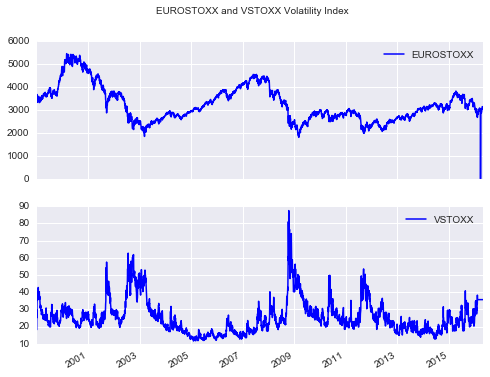

In [53]:
data.plot(subplots=True, grid=True, style='b', figsize=(8,6),lw=1.5, title="EUROSTOXX and VSTOXX Volatility Index");


In [55]:
returns = np.log(data/data.shift(1))
returns.head()

,EUROSTOXX,VSTOXX
1999-01-04,NaN,NaN
1999-01-05,0.017228,0.489248
1999-01-06,0.022138,-0.165317
1999-01-07,-0.015723,0.256337
1999-01-08,-0.003120,0.021570


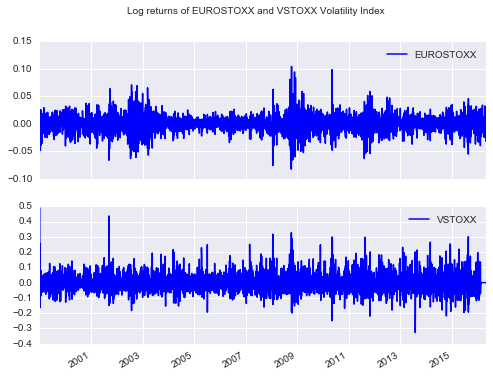

In [56]:
returns.plot(subplots=True, grid=True, style='b', figsize=(8,6),lw=1.5, title="Log returns of EUROSTOXX and VSTOXX Volatility Index");


In [92]:
import statsmodels.api as sm
xdat = returns['EUROSTOXX'][:-100]
ydat = returns['VSTOXX'][:-100]
model = pd.ols(y=ydat, x=xdat)
model



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         4342
Number of Degrees of Freedom:   2

R-squared:         0.5393
Adj R-squared:     0.5392

Rmse:              0.0393

F-stat (1, 4340):  5080.8952, p-value:     0.0000

Degrees of Freedom: model 1, resid 4340

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -2.8310     0.0397     -71.28     0.0000    -2.9088    -2.7531
     intercept     0.0000     0.0006       0.03     0.9780    -0.0012     0.0012
---------------------------------End of Summary---------------------------------

In [93]:
#Lets look at our coefficients
model.beta

x           -2.830958
intercept    0.000016
dtype: float64

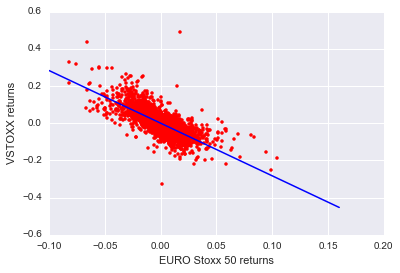

In [102]:
plt.plot(xdat,ydat, 'r.')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, model.beta[1] + model.beta[0] * x, 'b', lw=1.5);
plt.grid(True)
plt.xlabel('EURO Stoxx 50 returns');
plt.ylabel('VSTOXX returns');

In [103]:
#Lets look at the covariance matrix
returns.corr()

,EUROSTOXX,VSTOXX
EUROSTOXX,1.000000,-0.733192
VSTOXX,-0.733192,1.000000


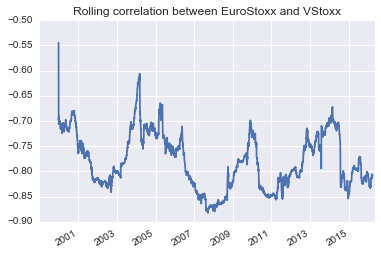

In [108]:
#pd.rolling_corr(returns.EUROSTOXX, returns.VSTOXX, window = 252).plot(grid=True)
returns['EUROSTOXX'].rolling(window=252).corr(other=returns['VSTOXX']).plot(title='Rolling correlation between EuroStoxx and VStoxx');